## Script to generate training, test dataset
This script load files generated by the run model and create a dataset for the neural network

In [13]:
from neuralsw.model.datatools import mydata
import numpy as np
import os

In [14]:
#Reference dataset (uncomment the one you want)

#rootdir
rootdir = os.path.realpath(\
    os.path.join(os.getcwd(),'../..'))

#directory to store the data
datadir = os.path.realpath(os.path.join(rootdir,'data'))

#Liste of available datasets
datafile = 'train_dataset_std.nc'
#datafile = 'test_dataset_std.nc'
#datafile = 'test_dataset_windvar.nc'
#datafile = 'test_dataset_warsmooth.nc'

#detect prefix and suffix
pref = datafile.split('_')[0]
suf  = datafile.split('_')[-1].split('.')[0]

In [20]:
#define params for generating dataset
allparams = {0:{'suf':'nonoise','outfield':'uparam','infield':['uphy','hphy','taux'],'in_noise':0,'out_noise':0},
             1:{'suf':'noise01','outfield':'uparam','infield':['uphy','hphy','taux'],'in_noise':0.1,'out_noise':0.1},
             2:{'suf':'nonoise','outfield':'vparam','infield':['vphy','hphy','tauy'],'in_noise':0,'out_noise':0},
             3:{'suf':'noise01','outfield':'vparam','infield':['vphy','hphy','tauy'],'in_noise':0.1,'out_noise':0.1}}

selected = 2

dpar = allparams[selected]

outname = '_'.join([pref,dpar['outfield'],dpar['suf'],suf])
fname = os.path.join(datadir,outname)
print ('output name:',fname)

output name: /Users/brajard/Documents/recherche/collaboration/bigdata/shallownn/data/train_vparam_nonoise_std


In [21]:
#Generate the training set
app = mydata(os.path.join(datadir,datafile),
            outfield=dpar['outfield'],
            infield=dpar['infield'],
            forcfield=[],
            dt=1)
app.make_base_im()

In [22]:
## add noise
if dpar['in_noise']>0:
    for i in range(app._X.shape[-1]):
        et = app._X[:,:,:,i].ravel().std()
        eps = np.random.normal(0,et*dpar['in_noise'],size=app._X[:,:,:,i].shape)
        app._X[:,:,:,i]+=eps
if dpar['out_noise']>0:
    et = app._y.ravel().std()
    eps = np.random.normal(0,et*dpar['out_noise'],size=app._y.shape)
    app._y += eps

In [23]:
## save dataset 
app.save_base(fname)

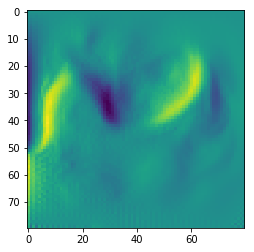

In [24]:
import matplotlib.pyplot as plt
plt.imshow(app._y[10,:,:,0]);
plt.show()
